# Just Fun with ANN

## Dataset :- Churn_modelling
### Task :- To point out those customers of bank who has high chance of leaving the bank

#### importing librabries

In [252]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [253]:
data = pd.read_csv('Churn_Modelling.csv')

clearly info() tells all the columns are not null so we can skip data missing processing ;-)



In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Clearly we can see some columns contribute nothing whether coustomer will leave or stay you can see like 
RowNumber,CustomerId
Surname can contribute like may be staff is irritating from entring long surname.Hmm lets find out

In [255]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


lets plot how many people left and how many decided to stay with bank

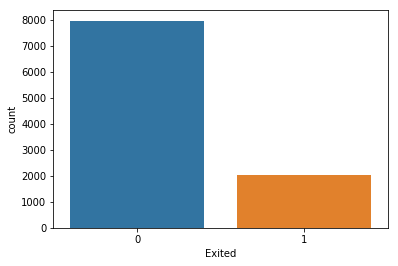

In [256]:
sns.countplot(data = data,x='Exited')

Lets calculate the length of surname of each person

In [257]:
data['Surname'] = data['Surname'].apply(len)

In [258]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,8,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,4,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,4,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,8,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Lets Find out whether there is corelation between len of surname and Exited

Simply NO So i was wrong but it was good to verify

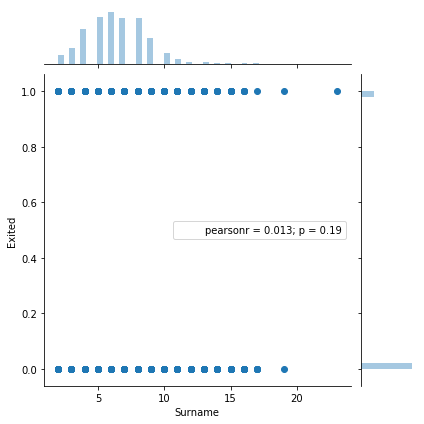

In [259]:
sns.jointplot(data = data,x='Surname', y='Exited')

lets split data into really valuable set and remove useless columns

In [260]:
data = data.iloc[:,3:]

In [261]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Let play with visualization lets us find out Gender has how much contibution in keeping customer stick to bank

/home/nitin/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


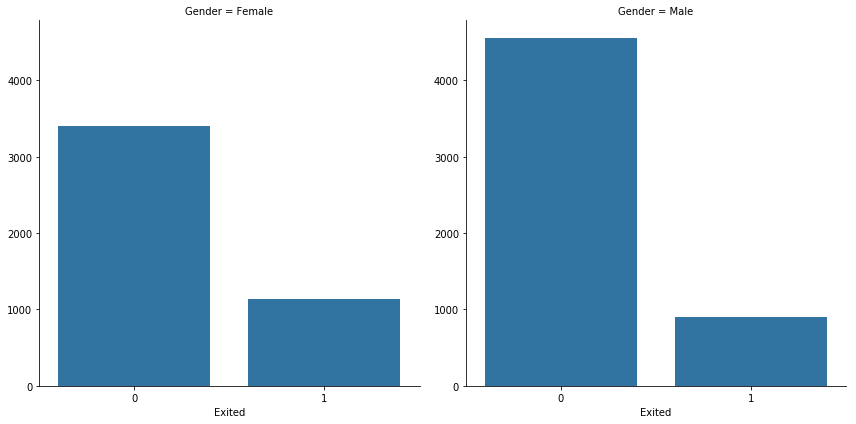

In [262]:
facet = sns.FacetGrid(data=data,col='Gender', size = 6)
facet.map(sns.countplot,'Exited')

/home/nitin/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


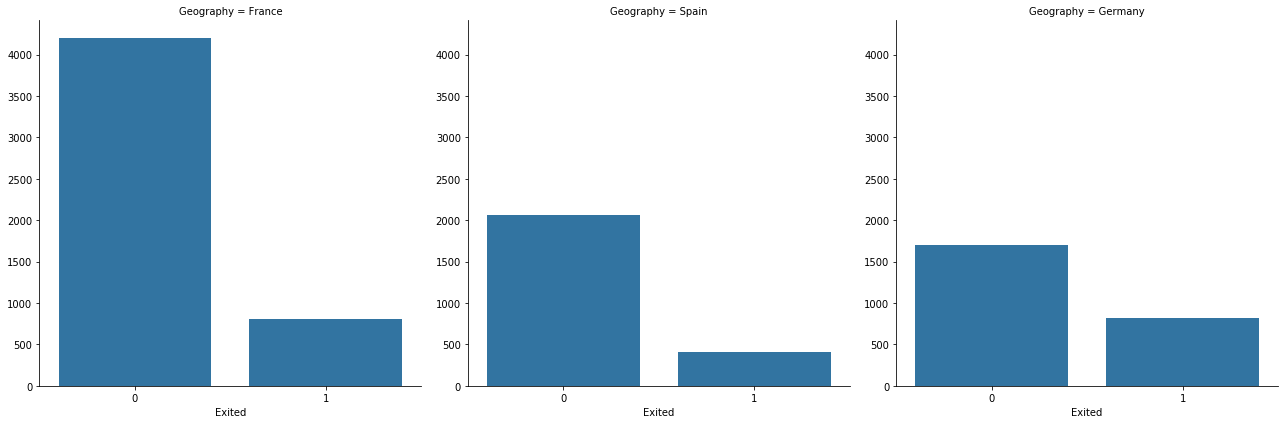

In [263]:
facet = sns.FacetGrid(data=data,col='Geography', size = 6)
facet.map(sns.countplot,'Exited')

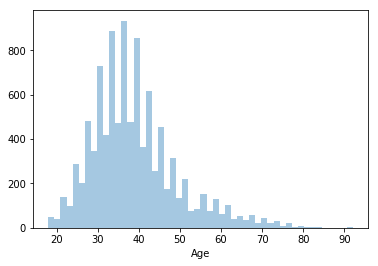

In [264]:
sns.distplot(data['Age'],kde=False)

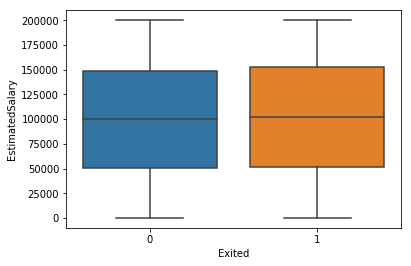

In [265]:
sns.boxplot(data=data,x='Exited',y='EstimatedSalary')

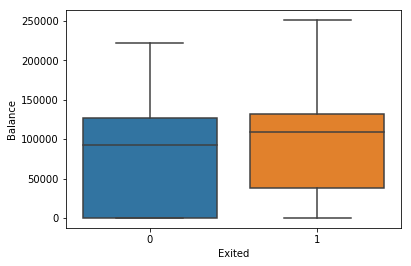

In [266]:
sns.boxplot(data=data,x='Exited',y='Balance')

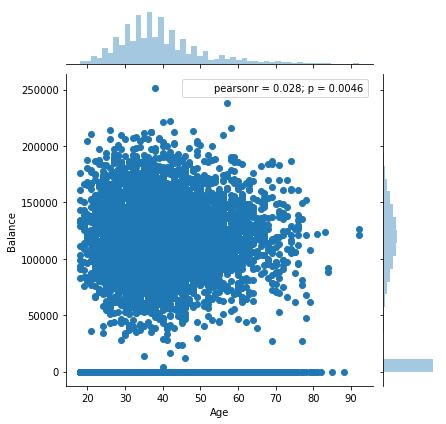

In [267]:
sns.jointplot(data=data,x='Age',y='Balance')

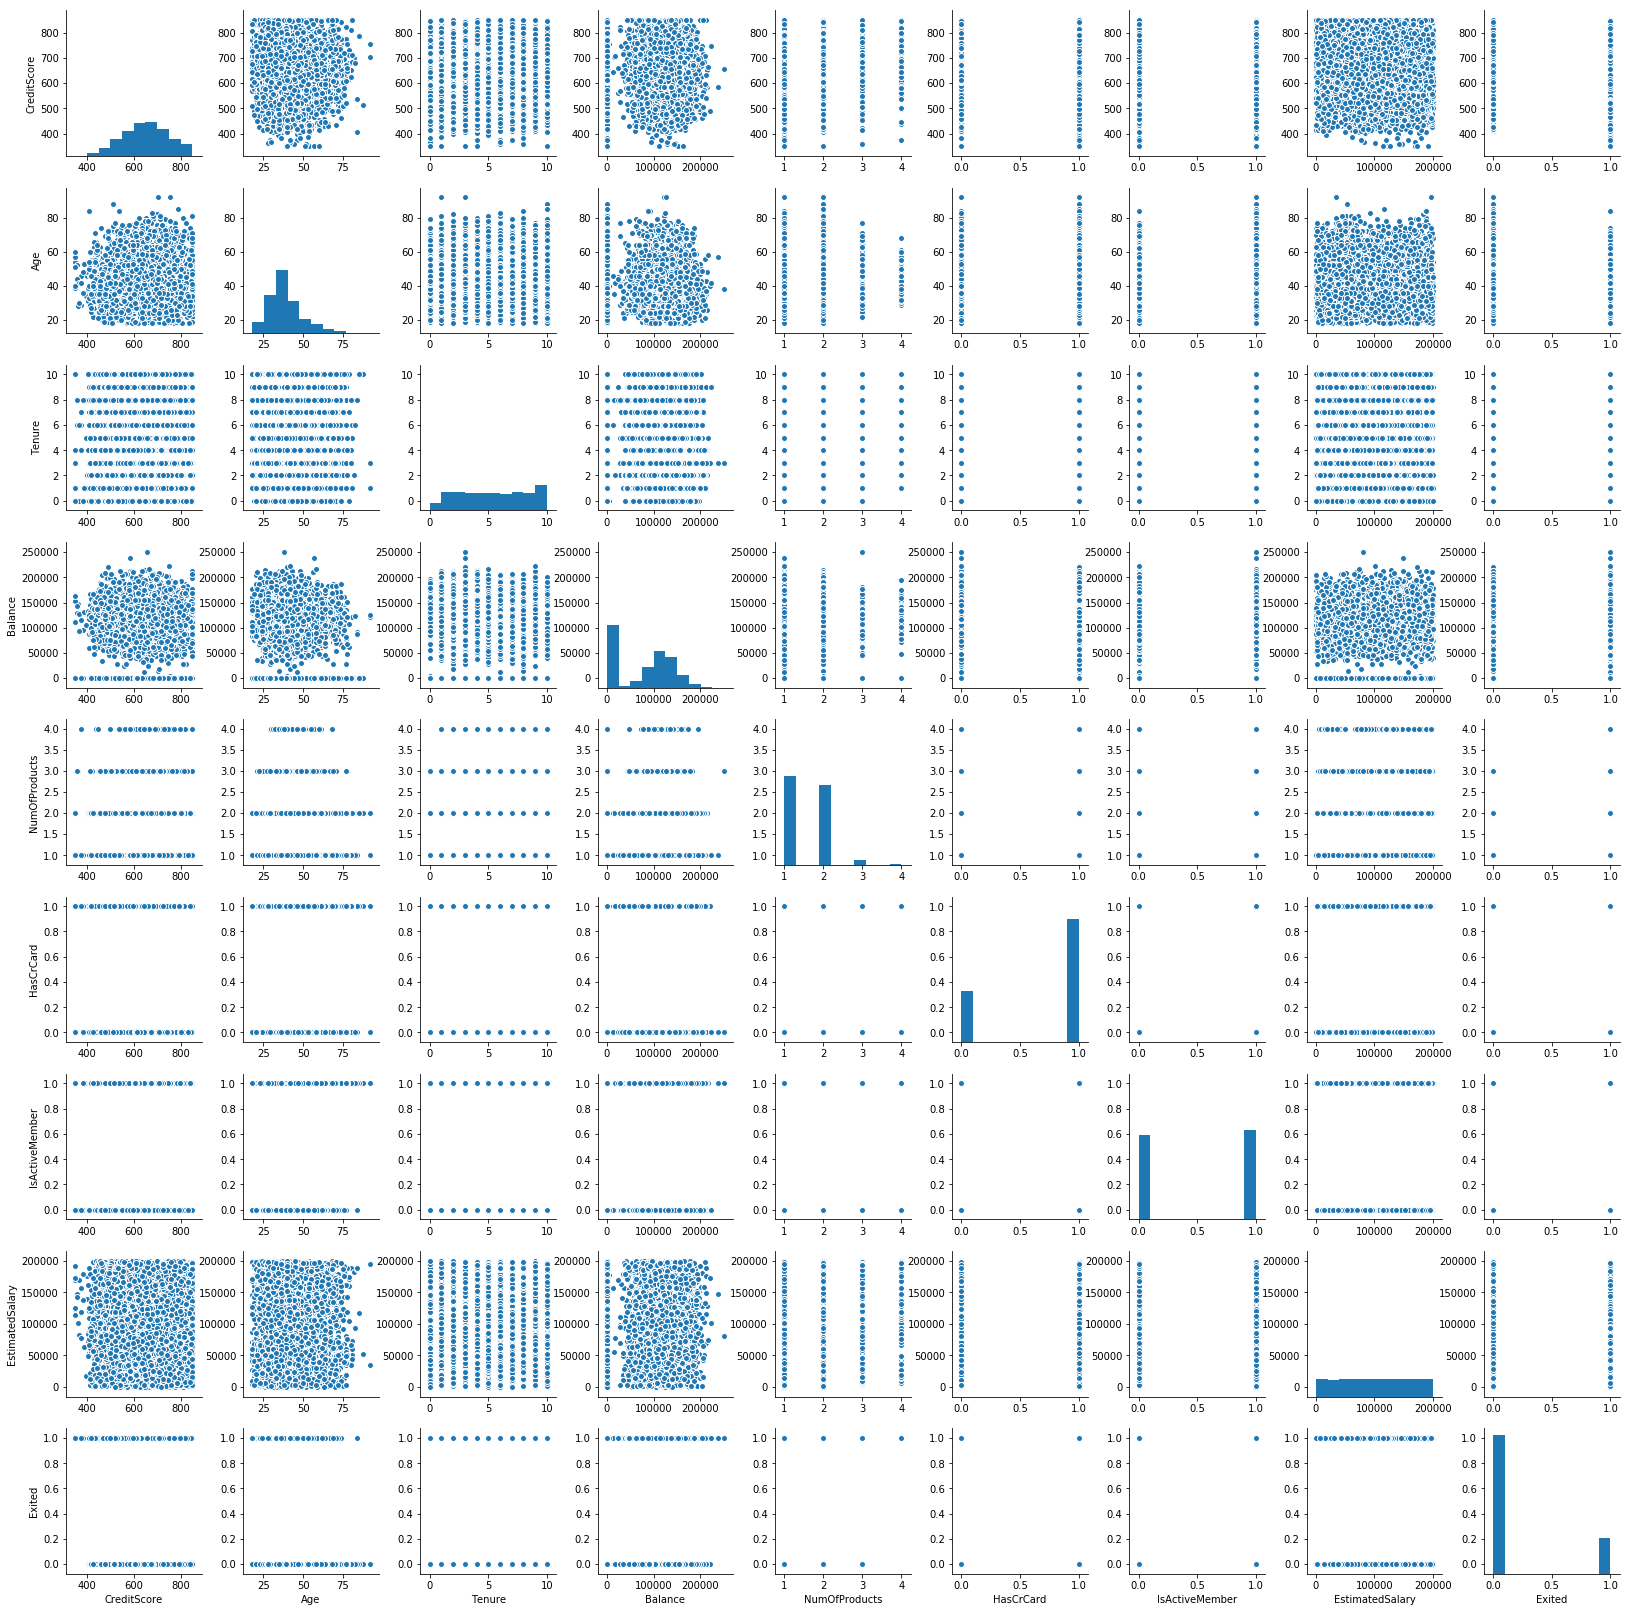

In [268]:
sns.pairplot(data=data)

# Data Preprocessing

In [270]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder,OneHotEncoder

In [271]:
lb = LabelBinarizer()

In [272]:
data['Gender'] = lb.fit_transform(data['Gender'])

In [273]:
data = pd.get_dummies(data,columns=['Geography'],drop_first=True)

# Data Spliting

In [275]:
from sklearn.model_selection import train_test_split

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Machine Learning

In [279]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [280]:
model = Sequential()

In [281]:
model.add(Dense(units=6,kernel_initializer = 'uniform', activation='relu',input_dim = 11)) #first hidden layer

In [282]:
model.add(Dense(units = 6,kernel_initializer = 'uniform', activation='relu')) #second hidden layer

In [283]:
model.add(Dense(units = 1,kernel_initializer = 'uniform', activation='sigmoid')) #output hidden layer

In [284]:
model.compile(optimizer='adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [285]:
model.fit(X_train,y_train,batch_size = 10,epochs=100,verbose = 1)

Epoch 1/100
8000/8000 [==============================] - 2s 263us/step - loss: 0.4855 - acc: 0.7939
Epoch 2/100
8000/8000 [==============================] - 2s 206us/step - loss: 0.4307 - acc: 0.7945
Epoch 3/100
8000/8000 [==============================] - 2s 206us/step - loss: 0.4244 - acc: 0.7971
Epoch 4/100
8000/8000 [==============================] - 2s 210us/step - loss: 0.4204 - acc: 0.8234
Epoch 5/100
8000/8000 [==============================] - 2s 203us/step - loss: 0.4180 - acc: 0.8264 1s
Epoch 6/100
8000/8000 [==============================] - 2s 203us/step - loss: 0.4164 - acc: 0.8324
Epoch 7/100
8000/8000 [==============================] - 2s 211us/step - loss: 0.4149 - acc: 0.8319
Epoch 8/100
8000/8000 [==============================] - 2s 204us/step - loss: 0.4137 - acc: 0.8321
Epoch 9/100
8000/8000 [==============================] - 2s 204us/step - loss: 0.4126 - acc: 0.8342
Epoch 10/100
8000/8000 [==============================] - 2s 207us/step - loss: 0.4121 - acc: 0.8

8000/8000 [==============================] - 2s 205us/step - loss: 0.4022 - acc: 0.8345
Epoch 83/100
8000/8000 [==============================] - 2s 198us/step - loss: 0.4021 - acc: 0.8342
Epoch 84/100
8000/8000 [==============================] - 2s 211us/step - loss: 0.4018 - acc: 0.8351
Epoch 85/100
8000/8000 [==============================] - 2s 211us/step - loss: 0.4021 - acc: 0.8341
Epoch 86/100
8000/8000 [==============================] - 2s 202us/step - loss: 0.4020 - acc: 0.8357
Epoch 87/100
8000/8000 [==============================] - 2s 206us/step - loss: 0.4019 - acc: 0.8357
Epoch 88/100
8000/8000 [==============================] - 2s 204us/step - loss: 0.4017 - acc: 0.8360
Epoch 89/100
8000/8000 [==============================] - 2s 206us/step - loss: 0.4017 - acc: 0.8359
Epoch 90/100
8000/8000 [==============================] - 2s 211us/step - loss: 0.4017 - acc: 0.8355
Epoch 91/100
8000/8000 [==============================] - 2s 200us/step - loss: 0.4018 - acc: 0.8355
Epo

In [286]:
y_pred  =  model.predict(X_test)
y_pred = (y_pred > 0.5)

In [287]:
from sklearn.metrics import confusion_matrix,classification_report

In [288]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.85      0.97      0.91      1607
          1       0.70      0.32      0.44       393

avg / total       0.82      0.84      0.81      2000



# well Done we did it although not good score at last but we can see that support for customers leaving the bank is high that was out target so great we did it ;-)